In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import utils

# MNIST dataset params
num_classes = 10 # 0-9 digits
num_features = 784 # img shape: 28*28

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, y_train, X_test, y_test = utils.preprocess(X_train, y_train, X_test, y_test, num_classes, num_features, print_summary=False)

In [2]:
# network params
n_hidden_1 = 128
n_hidden_2 = 256

# **$1$. MLP with Adam optimizer**

## $a$. Default Case

In [3]:
# create model
mlp_adam_1 = utils.create_mlp("MLP_Adam_1", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes)

Model: "MLP_Adam_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [4]:
# compile model
mlp_adam_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(), 
                metrics=['accuracy'])

# train model
mlp_adam_1_history = mlp_adam_1.fit(X_train, y_train, batch_size=256, epochs=100, 
                        validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 0.3928 - accuracy: 0.8909 - val_loss: 0.1871 - val_accuracy: 0.9464
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1519 - accuracy: 0.9556 - val_loss: 0.1329 - val_accuracy: 0.9595
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1065 - accuracy: 0.9681 - val_loss: 0.1041 - val_accuracy: 0.9689
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0785 - accuracy: 0.9765 - val_loss: 0.0966 - val_accuracy: 0.9704
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9813 - val_loss: 0.0829 - val_accuracy: 0.9748
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0497 - accuracy: 0.9849 - val_loss: 0.0819 - val_accuracy: 0.9739
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0791 - val_accuracy: 0.9764

Evaluation on training data:
1750/1750 [==============================] - 3s 1ms/step - loss: 5.7368e-06 - accuracy: 1.0000
Evaluation on testing data:
438/438 [==============================] - 0s 998us/step - loss: 0.1309 - accuracy: 0.9822


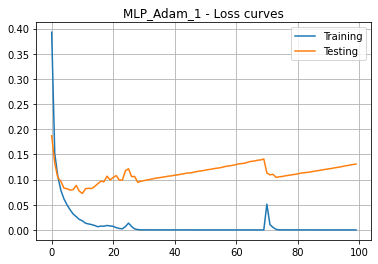

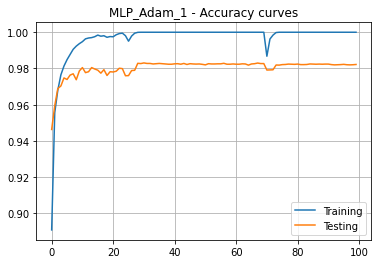

In [5]:
# display results
utils.disp_results(mlp_adam_1, X_train, y_train, X_test, y_test, mlp_adam_1_history)

## $b$. $L2$ regularization

### $i)$ $\;\alpha=0.1$

In [6]:
a_reg = 0.1

In [7]:
# create model
mlp_adam_2 = utils.create_mlp("MLP_Adam_2", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes, kernel_reg="l2", a_reg=a_reg)

Model: "MLP_Adam_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [8]:
# compile model
mlp_adam_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(), 
                metrics=['accuracy'])

# train model
mlp_adam_2_history = mlp_adam_2.fit(X_train, y_train, batch_size=256, epochs=100, 
                        validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 7.7855 - accuracy: 0.5480 - val_loss: 2.3152 - val_accuracy: 0.5234
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 2.2919 - accuracy: 0.5454 - val_loss: 2.2677 - val_accuracy: 0.5736
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 2.2665 - accuracy: 0.5648 - val_loss: 2.2507 - val_accuracy: 0.5750
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 2.2556 - accuracy: 0.5737 - val_loss: 2.2407 - val_accuracy: 0.5721
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 2.2509 - accuracy: 0.5759 - val_loss: 2.2402 - val_accuracy: 0.5871
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 2.2483 - accuracy: 0.5804 - val_loss: 2.2351 - val_accuracy: 0.5894
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 2.2453 - accuracy: 0.5852 - val_loss: 2.2370 - val_accuracy: 0.6082

Evaluation on training data:
1750/1750 [==============================] - 3s 1ms/step - loss: 2.2364 - accuracy: 0.6002
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: 2.2288 - accuracy: 0.6030


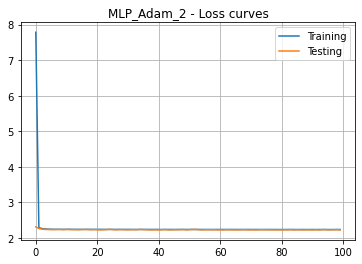

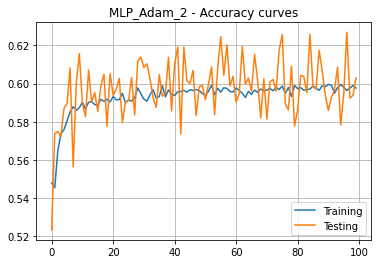

In [9]:
# display results
utils.disp_results(mlp_adam_2, X_train, y_train, X_test, y_test, mlp_adam_2_history)

### $ii)$ $\;\alpha=0.01$

In [10]:
a_reg = 0.01

In [11]:
# create model
mlp_adam_3 = utils.create_mlp("MLP_Adam_3", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes, kernel_reg="l2", a_reg=a_reg)

Model: "MLP_Adam_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile model
mlp_adam_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(), 
                metrics=['accuracy'])

# train model
mlp_adam_3_history = mlp_adam_3.fit(X_train, y_train, batch_size=256, epochs=100, 
                        validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 1.7821 - accuracy: 0.8688 - val_loss: 0.8851 - val_accuracy: 0.9111
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8307 - accuracy: 0.9088 - val_loss: 0.7838 - val_accuracy: 0.9148
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.7862 - accuracy: 0.9127 - val_loss: 0.7776 - val_accuracy: 0.9144
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.7753 - accuracy: 0.9134 - val_loss: 0.7578 - val_accuracy: 0.9185
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.7706 - accuracy: 0.9147 - val_loss: 0.7536 - val_accuracy: 0.9206
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.7657 - accuracy: 0.9161 - val_loss: 0.7493 - val_accuracy: 0.9207
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.7615 - accuracy: 0.9164 - val_loss: 0.7527 - val_accuracy: 0.9208

Evaluation on training data:
1750/1750 [==============================] - 3s 1ms/step - loss: 0.7330 - accuracy: 0.9212
Evaluation on testing data:
438/438 [==============================] - 0s 1ms/step - loss: 0.7293 - accuracy: 0.9214


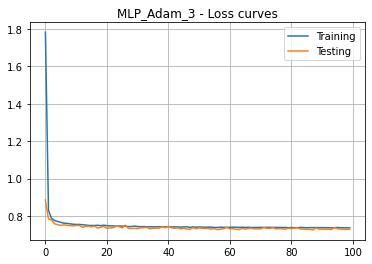

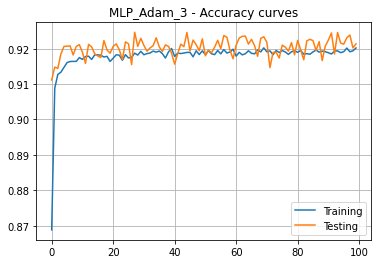

In [13]:
# display results
utils.disp_results(mlp_adam_3, X_train, y_train, X_test, y_test, mlp_adam_3_history)

### $iii)$ $\;\alpha=0.001$

In [14]:
a_reg = 0.001

In [15]:
# create model
mlp_adam_4 = utils.create_mlp("MLP_Adam_4", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes, kernel_reg="l2", a_reg=a_reg)

Model: "MLP_Adam_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [16]:
# compile model
mlp_adam_4.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(), 
                metrics=['accuracy'])

# train model
mlp_adam_4_history = mlp_adam_4.fit(X_train, y_train, batch_size=256, epochs=100, 
                        validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6906 - accuracy: 0.8864 - val_loss: 0.4285 - val_accuracy: 0.9444
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3830 - accuracy: 0.9507 - val_loss: 0.3348 - val_accuracy: 0.9611
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3133 - accuracy: 0.9618 - val_loss: 0.2946 - val_accuracy: 0.9644
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2750 - accuracy: 0.9674 - val_loss: 0.2668 - val_accuracy: 0.9682
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2490 - accuracy: 0.9720 - val_loss: 0.2475 - val_accuracy: 0.9711
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2358 - accuracy: 0.9735 - val_loss: 0.2482 - val_accuracy: 0.9673
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2265 - accuracy: 0.9745 - val_loss: 0.2315 - val_accuracy: 0.9724

Evaluation on training data:
1750/1750 [==============================] - 3s 1ms/step - loss: 0.1796 - accuracy: 0.9866
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: 0.2024 - accuracy: 0.9771


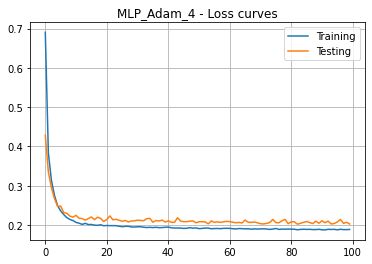

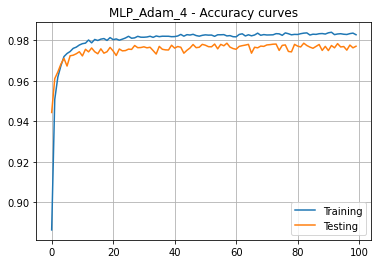

In [17]:
# display results
utils.disp_results(mlp_adam_4, X_train, y_train, X_test, y_test, mlp_adam_4_history)

## $c$. $L1$ regularization ($\alpha=0.01$) & Dropout ($probability=0.3$)

In [18]:
a_reg = 0.01
dropout_prob = 0.3

In [19]:
# create model
mlp_adam_5 = utils.create_mlp("MLP_Adam_5", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes, kernel_reg="l1", a_reg=a_reg,
                            dropout_layers=True, dropout_prob=dropout_prob)

Model: "MLP_Adam_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trai

In [20]:
# compile model
mlp_adam_5.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(), 
                metrics=['accuracy'])

# train model
mlp_adam_5_history = mlp_adam_5.fit(X_train, y_train, batch_size=256, epochs=100, 
                        validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.1119 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 8/100
219/219 [====================

Evaluation on training data:
1750/1750 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0984
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0995


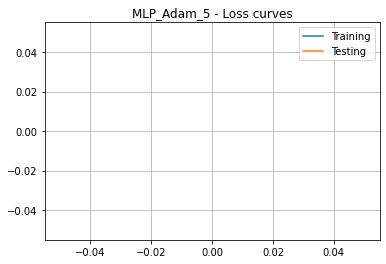

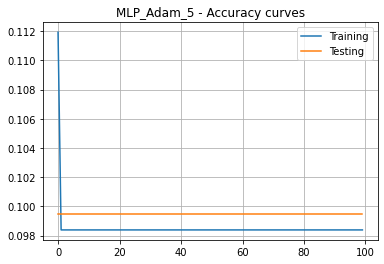

In [21]:
# display results
utils.disp_results(mlp_adam_5, X_train, y_train, X_test, y_test, mlp_adam_5_history)

# **$2$. MLP with RMSProp optimizer**

## $a$. Default Case

### $i)$ $\;\rho=0.01$

In [22]:
rho = 0.01

In [23]:
# create model
mlp_rmsprop_1 = utils.create_mlp("MLP_RMSProp_1", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes)

Model: "MLP_RMSProp_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [24]:
# compile model
mlp_rmsprop_1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho),
                    loss=tf.keras.losses.CategoricalCrossentropy(), 
                    metrics=['accuracy'])

# train model
mlp_rmsprop_1_history = mlp_rmsprop_1.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 0.4263 - accuracy: 0.8821 - val_loss: 0.2144 - val_accuracy: 0.9381
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1757 - accuracy: 0.9474 - val_loss: 0.1489 - val_accuracy: 0.9567
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1245 - accuracy: 0.9634 - val_loss: 0.1309 - val_accuracy: 0.9626
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1002 - accuracy: 0.9708 - val_loss: 0.1096 - val_accuracy: 0.9693
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0857 - accuracy: 0.9762 - val_loss: 0.1117 - val_accuracy: 0.9704
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0755 - accuracy: 0.9784 - val_loss: 0.1074 - val_accuracy: 0.9724
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0695 - accuracy: 0.9813 - val_loss: 0.1050 - val_accuracy: 0.9743

Evaluation on training data:
1750/1750 [==============================] - 3s 1ms/step - loss: 3.5976e-10 - accuracy: 1.0000
Evaluation on testing data:
438/438 [==============================] - 0s 1ms/step - loss: 0.4512 - accuracy: 0.9788


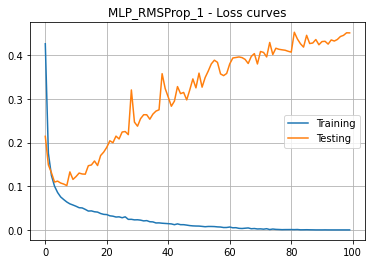

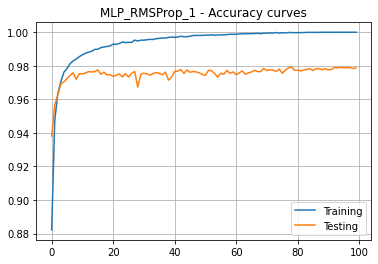

In [25]:
# display results
utils.disp_results(mlp_rmsprop_1, X_train, y_train, X_test, y_test, mlp_rmsprop_1_history)

### $ii)$ $\;\rho=0.99$

In [26]:
rho = 0.99

In [27]:
# create model
mlp_rmsprop_2 = utils.create_mlp("MLP_RMSProp_2", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes)

Model: "MLP_RMSProp_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [28]:
# compile model
mlp_rmsprop_2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho),
                    loss=tf.keras.losses.CategoricalCrossentropy(), 
                    metrics=['accuracy'])

# train model
mlp_rmsprop_2_history = mlp_rmsprop_2.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 0.3027 - accuracy: 0.9075 - val_loss: 0.1503 - val_accuracy: 0.9576
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1209 - accuracy: 0.9630 - val_loss: 0.1145 - val_accuracy: 0.9659
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0868 - accuracy: 0.9736 - val_loss: 0.0855 - val_accuracy: 0.9730
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0659 - accuracy: 0.9795 - val_loss: 0.0760 - val_accuracy: 0.9766
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.0832 - val_accuracy: 0.9735
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0712 - val_accuracy: 0.9790
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0781 - val_accuracy: 0.9764

Evaluation on training data:
1750/1750 [==============================] - 3s 1ms/step - loss: 0.0024 - accuracy: 0.9993
Evaluation on testing data:
438/438 [==============================] - 0s 1ms/step - loss: 0.1953 - accuracy: 0.9809


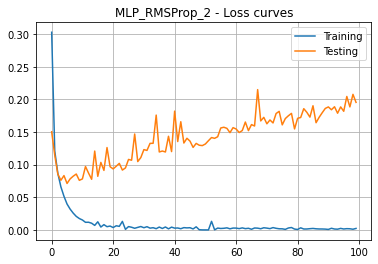

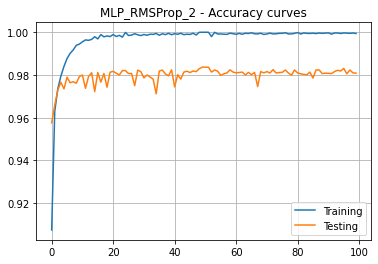

In [29]:
# display results
utils.disp_results(mlp_rmsprop_2, X_train, y_train, X_test, y_test, mlp_rmsprop_2_history)

## $b$. $L2$ regularization ($\alpha=0.01$)

In [30]:
a_reg = 0.01

### $i)$ $\;\rho=0.01$

In [31]:
rho = 0.01

In [32]:
# create model
mlp_rmsprop_3 = utils.create_mlp("MLP_RMSProp_3", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes,
                            kernel_reg="l2", a_reg=a_reg)

Model: "MLP_RMSProp_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [33]:
# compile model
mlp_rmsprop_3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho),
                    loss=tf.keras.losses.CategoricalCrossentropy(), 
                    metrics=['accuracy'])

# train model
mlp_rmsprop_3_history = mlp_rmsprop_3.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 1.9427 - accuracy: 0.8510 - val_loss: 1.0581 - val_accuracy: 0.8941
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9431 - accuracy: 0.8965 - val_loss: 0.8492 - val_accuracy: 0.9044
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8475 - accuracy: 0.9001 - val_loss: 0.8084 - val_accuracy: 0.9079
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8225 - accuracy: 0.9033 - val_loss: 0.8046 - val_accuracy: 0.9099
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8095 - accuracy: 0.9056 - val_loss: 0.8144 - val_accuracy: 0.9062
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8043 - accuracy: 0.9064 - val_loss: 0.7828 - val_accuracy: 0.9104
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.7992 - accuracy: 0.9078 - val_loss: 0.7760 - val_accuracy: 0.9109

Evaluation on training data:
1750/1750 [==============================] - 3s 1ms/step - loss: 0.7454 - accuracy: 0.9155
Evaluation on testing data:
438/438 [==============================] - 0s 1ms/step - loss: 0.7427 - accuracy: 0.9143


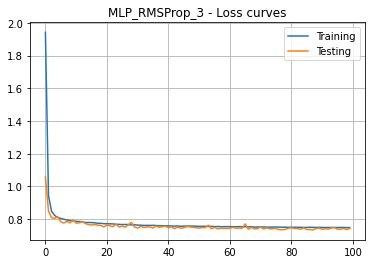

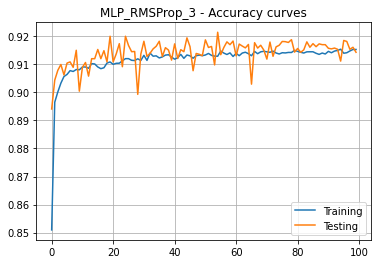

In [34]:
# display results
utils.disp_results(mlp_rmsprop_3, X_train, y_train, X_test, y_test, mlp_rmsprop_3_history)

### $ii)$ $\;\rho=0.99$

In [35]:
rho = 0.99

In [36]:
# create model
mlp_rmsprop_4 = utils.create_mlp("MLP_RMSProp_4", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes,
                            kernel_reg="l2", a_reg=a_reg)

Model: "MLP_RMSProp_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [37]:
# compile model
mlp_rmsprop_4.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho),
                    loss=tf.keras.losses.CategoricalCrossentropy(), 
                    metrics=['accuracy'])

# train model
mlp_rmsprop_4_history = mlp_rmsprop_4.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3144 - accuracy: 0.8590 - val_loss: 0.8877 - val_accuracy: 0.8940
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8423 - accuracy: 0.9015 - val_loss: 0.8020 - val_accuracy: 0.9065
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8095 - accuracy: 0.9050 - val_loss: 0.7941 - val_accuracy: 0.9040
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.7978 - accuracy: 0.9065 - val_loss: 0.7793 - val_accuracy: 0.9114
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.7873 - accuracy: 0.9094 - val_loss: 0.8003 - val_accuracy: 0.9047
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.7841 - accuracy: 0.9101 - val_loss: 0.7950 - val_accuracy: 0.8945
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.7792 - accuracy: 0.9108 - val_loss: 0.7568 - val_accuracy: 0.9178

Evaluation on training data:
1750/1750 [==============================] - 3s 1ms/step - loss: 0.7356 - accuracy: 0.9211
Evaluation on testing data:
438/438 [==============================] - 0s 1ms/step - loss: 0.7319 - accuracy: 0.9224


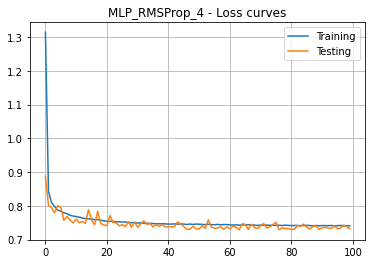

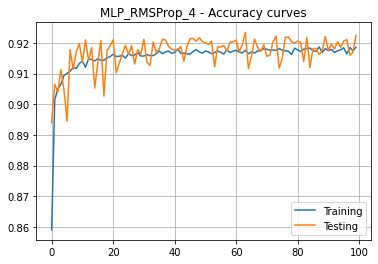

In [38]:
# display results
utils.disp_results(mlp_rmsprop_4, X_train, y_train, X_test, y_test, mlp_rmsprop_4_history)

## $c$. $L1$ regularization ($\alpha=0.01$) & Dropout ($probability=0.3$)

In [39]:
a_reg = 0.01
dropout_prob = 0.3

### $i)$ $\;\rho=0.01$

In [40]:
rho = 0.01

In [41]:
# create model
mlp_rmsprop_5 = utils.create_mlp("MLP_RMSProp_5", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes, kernel_reg="l1", a_reg=a_reg,
                            dropout_layers=True, dropout_prob=dropout_prob)

Model: "MLP_RMSProp_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-t

In [42]:
# compile model
mlp_rmsprop_5.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho),
                    loss=tf.keras.losses.CategoricalCrossentropy(), 
                    metrics=['accuracy'])

# train model
mlp_rmsprop_5_history = mlp_rmsprop_5.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 5ms/step - loss: 16.2475 - accuracy: 0.1161 - val_loss: 2.9786 - val_accuracy: 0.1141
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 6.8958 - accuracy: 0.1100 - val_loss: 2.9804 - val_accuracy: 0.1141
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 6.9010 - accuracy: 0.1103 - val_loss: 2.9780 - val_accuracy: 0.1141
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 6.8653 - accuracy: 0.1107 - val_loss: 2.9801 - val_accuracy: 0.1141
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 6.9302 - accuracy: 0.1090 - val_loss: 2.9781 - val_accuracy: 0.1141
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1086 - val_loss: nan - val_accuracy: 0.0995
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 8/10

Evaluation on training data:
1750/1750 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.0984
Evaluation on testing data:
438/438 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0995


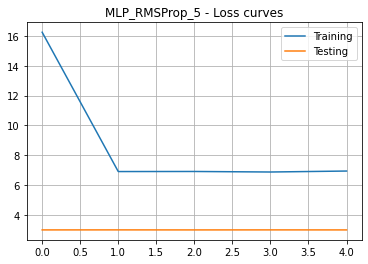

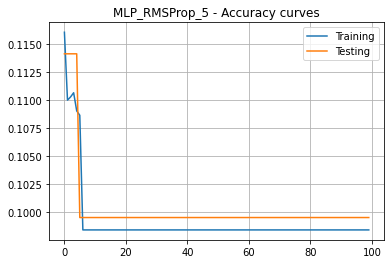

In [43]:
# display results
utils.disp_results(mlp_rmsprop_5, X_train, y_train, X_test, y_test, mlp_rmsprop_5_history)

### $ii)$ $\;\rho=0.99$

In [44]:
rho = 0.99

In [45]:
# create model
mlp_rmsprop_6 = utils.create_mlp("MLP_RMSProp_6", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes, kernel_reg="l1", a_reg=a_reg,
                            dropout_layers=True, dropout_prob=dropout_prob)

Model: "MLP_RMSProp_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-t

In [46]:
# compile model
mlp_rmsprop_6.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho),
                    loss=tf.keras.losses.CategoricalCrossentropy(), 
                    metrics=['accuracy'])

# train model
mlp_rmsprop_6_history = mlp_rmsprop_6.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 5ms/step - loss: 9.1379 - accuracy: 0.1068 - val_loss: 2.9264 - val_accuracy: 0.1141
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 6.7101 - accuracy: 0.1089 - val_loss: 2.7440 - val_accuracy: 0.1141
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 6.6596 - accuracy: 0.1098 - val_loss: 2.7447 - val_accuracy: 0.1141
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 6.6273 - accuracy: 0.1087 - val_loss: 2.7277 - val_accuracy: 0.1141
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 6.6405 - accuracy: 0.1095 - val_loss: 2.7429 - val_accuracy: 0.1141
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 6.6243 - accuracy: 0.1096 - val_loss: 2.7244 - val_accuracy: 0.1141
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 6.6411 - accuracy: 0.1084 - val_loss: 2.7292 - val_accuracy: 0.1141

Evaluation on training data:
1750/1750 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.0984
Evaluation on testing data:
438/438 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0995


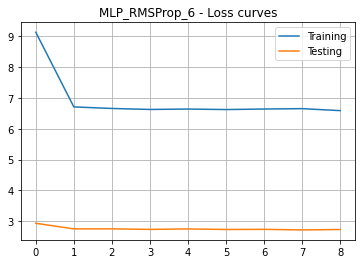

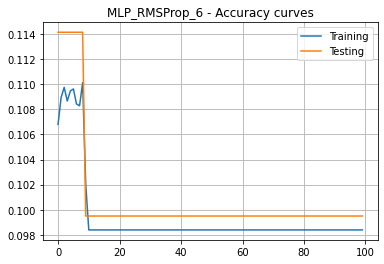

In [47]:
# display results
utils.disp_results(mlp_rmsprop_6, X_train, y_train, X_test, y_test, mlp_rmsprop_6_history)

# **$3$. MLP with SGD optimizer**

***Weight initializer**: Gaussian distribution, mean = 10*

In [48]:
gaussian_mean = 10

## $a$. Default Case

In [49]:
# create model
mlp_sgd_1 = utils.create_mlp("MLP_SGD_1", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes,
                            gaussian_init=True, gaussian_mean=gaussian_mean)

Model: "MLP_SGD_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [50]:
# compile model
mlp_sgd_1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# train model
mlp_sgd_1_history = mlp_sgd_1.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 2880161024.0000 - accuracy: 0.1115 - val_loss: 2.3019 - val_accuracy: 0.1141
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3019 - accuracy: 0.1121 - val_loss: 2.3015 - val_accuracy: 0.1141
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3017 - accuracy: 0.1121 - val_loss: 2.3013 - val_accuracy: 0.1141
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3016 - accuracy: 0.1121 - val_loss: 2.3011 - val_accuracy: 0.1141
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3015 - accuracy: 0.1121 - val_loss: 2.3010 - val_accuracy: 0.1141
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3014 - accuracy: 0.1121 - val_loss: 2.3009 - val_accuracy: 0.1141
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3014 - accuracy: 0.1121 - val_loss: 2.3008 - val_accurac

Evaluation on training data:
1750/1750 [==============================] - 2s 1ms/step - loss: 2.3013 - accuracy: 0.1121
Evaluation on testing data:
438/438 [==============================] - 0s 977us/step - loss: 2.3006 - accuracy: 0.1141


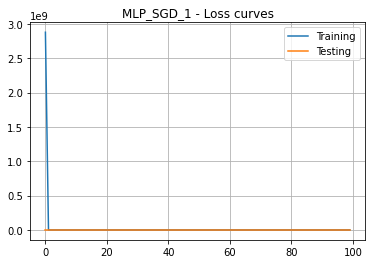

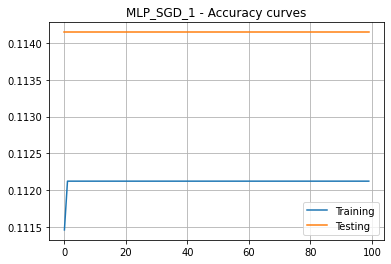

In [51]:
# display results
utils.disp_results(mlp_sgd_1, X_train, y_train, X_test, y_test, mlp_sgd_1_history)

## $b$. $L2$ regularization

### $i)$ $\;\alpha=0.1$

In [52]:
a_reg = 0.1

In [53]:
# create model
mlp_sgd_2 = utils.create_mlp("MLP_SGD_2", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes,
                            gaussian_init=True, gaussian_mean=gaussian_mean,
                            kernel_reg="l2", a_reg=a_reg)

Model: "MLP_SGD_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [54]:
# compile model
mlp_sgd_2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# train model
mlp_sgd_2_history = mlp_sgd_2.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 1910971957248.0000 - accuracy: 0.1119 - val_loss: 1205623062528.0000 - val_accuracy: 0.1141
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 804786143232.0000 - accuracy: 0.1121 - val_loss: 501636005888.0000 - val_accuracy: 0.1141
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 334855536640.0000 - accuracy: 0.1121 - val_loss: 208720756736.0000 - val_accuracy: 0.1141
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 139326767104.0000 - accuracy: 0.1121 - val_loss: 86844612608.0000 - val_accuracy: 0.1141
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 57971138560.0000 - accuracy: 0.1121 - val_loss: 36134318080.0000 - val_accuracy: 0.1141
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 24120641536.0000 - accuracy: 0.1121 - val_loss: 15034765312.0000 - val_accuracy: 0.1141
Epoch 7/100
2

Evaluation on training data:
1750/1750 [==============================] - 3s 1ms/step - loss: 2.3013 - accuracy: 0.1121
Evaluation on testing data:
438/438 [==============================] - 0s 1ms/step - loss: 2.3006 - accuracy: 0.1141


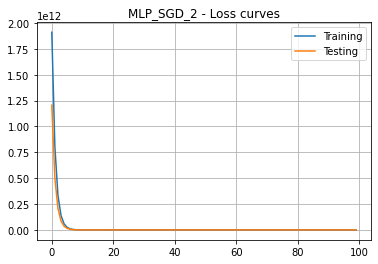

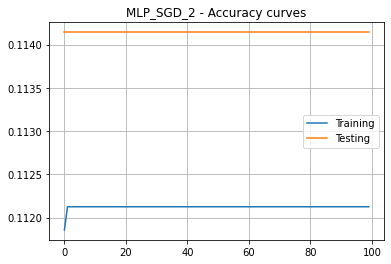

In [55]:
# display results
utils.disp_results(mlp_sgd_2, X_train, y_train, X_test, y_test, mlp_sgd_2_history)

### $ii)$ $\;\alpha=0.01$

In [56]:
a_reg = 0.01

In [57]:
# create model
mlp_sgd_3 = utils.create_mlp("MLP_SGD_3", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes,
                            gaussian_init=True, gaussian_mean=gaussian_mean,
                            kernel_reg="l2", a_reg=a_reg)

Model: "MLP_SGD_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [58]:
# compile model
mlp_sgd_3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# train model
mlp_sgd_3_history = mlp_sgd_3.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 113001938944.0000 - accuracy: 0.1115 - val_loss: 107159584768.0000 - val_accuracy: 0.1141
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 102625230848.0000 - accuracy: 0.1121 - val_loss: 98170880000.0000 - val_accuracy: 0.1141
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 94016929792.0000 - accuracy: 0.1121 - val_loss: 89936314368.0000 - val_accuracy: 0.1141
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 86130720768.0000 - accuracy: 0.1121 - val_loss: 82392367104.0000 - val_accuracy: 0.1141
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 78906015744.0000 - accuracy: 0.1121 - val_loss: 75481219072.0000 - val_accuracy: 0.1141
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 72287305728.0000 - accuracy: 0.1121 - val_loss: 69149843456.0000 - val_accuracy: 0.1141
Epoch 7/100
219/219

Evaluation on training data:
1750/1750 [==============================] - 3s 1ms/step - loss: 18335228.0000 - accuracy: 0.1121
Evaluation on testing data:
438/438 [==============================] - 0s 1ms/step - loss: 18334848.0000 - accuracy: 0.1141


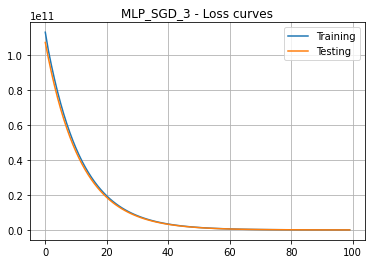

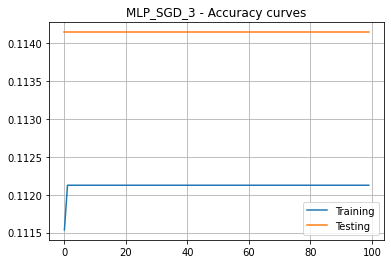

In [59]:
# display results
utils.disp_results(mlp_sgd_3, X_train, y_train, X_test, y_test, mlp_sgd_3_history)

## $c$. $L1$ regularization ($\alpha=0.01$) & Dropout ($probability=0.3$)

In [60]:
a_reg = 0.01
dropout_prob = 0.3

In [61]:
# create model
mlp_sgd_4 = utils.create_mlp("MLP_SGD_4", 
                            n_hidden_1, n_hidden_2, 
                            num_features, num_classes,
                            gaussian_init=True, gaussian_mean=gaussian_mean,
                            kernel_reg="l1", a_reg=a_reg,
                            dropout_layers=True, dropout_prob=dropout_prob)

Model: "MLP_SGD_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
 dropout_11 (Dropout)        (None, 10)                0         
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-train

In [62]:
# compile model
mlp_sgd_4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# train model
mlp_sgd_4_history = mlp_sgd_4.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0995
Epoch 8/100
219/219 [====================

Evaluation on training data:
1750/1750 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.0984
Evaluation on testing data:
438/438 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0995


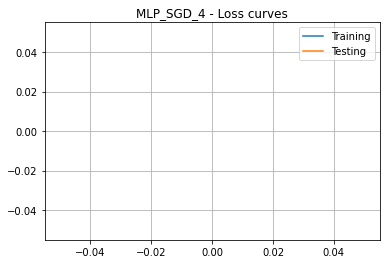

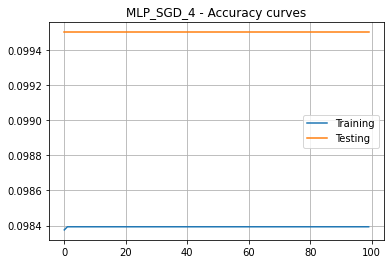

In [63]:
# display results
utils.disp_results(mlp_sgd_4, X_train, y_train, X_test, y_test, mlp_sgd_4_history)